<a href="https://colab.research.google.com/github/AmirKh20/Computer-Vision-Assignments/blob/master/apples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np

image = "photo_2024-05-16_11-47-11.jpg"

img = cv2.imread(image)
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

cv2.imwrite("hsv.jpg", hsv_img)
h_img, s_img, v_img = cv2.split(hsv_img)

cv2.imwrite("h.jpg", h_img)
cv2.imwrite("s.jpg", s_img)
cv2.imwrite("v.jpg", v_img)

b_img, g_img, r_img = cv2.split(img)
cv2.imwrite("b.jpg", b_img)
cv2.imwrite("g.jpg", g_img)
cv2.imwrite("r.jpg", r_img)

#lower_red = np.array([0, 0, 200], dtype = "uint8")
#upper_red = np.array([0, 0, 255], dtype = "uint8")
#
#cv2.inRange(img, lower_red, upper_red)



#window = cv2.namedWindow('images', cv2.WINDOW_NORMAL)
#
#cv2.imshow("images", hsv_img)
#cv2.waitKey(0)

_, binary_img = cv2.threshold(b_img, 170, 255, cv2.THRESH_BINARY_INV)
cv2.imwrite("binary_img.jpg", binary_img)

closed_img = cv2.morphologyEx(binary_img, cv2.MORPH_CLOSE, (25,25), iterations=20)
cv2.imwrite("closed_img.jpg", closed_img)

dilated_closed_img = cv2.dilate(closed_img, (10,10), iterations=5)
cv2.imwrite("dilated_closed_img.jpg", dilated_closed_img)

matrix = np.ones((300, 200))

count = 0
for i in range(325):
    for j in range(1000):
        sum = 0
        for k in range(i, i+300):
            for l in range(j, j+200):
                sum += dilated_closed_img[k, l]

        if sum > 15000000:
            count += 1

print(count)

##count = 0
#for 0 in range(625):
#    for 0 in range(1200):
#        if pixel == 255:
#            cropped_img = binary_img[]


contours, hierarchy = cv2.findContours(dilated_closed_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

print(len(contours))

0
5


In [ ]:
import cv2
import numpy as np

In [ ]:
img = cv2.imread("apple1.jpg")

In [ ]:
b_img, g_img, r_img = cv2.split(img)

In [ ]:
from google.colab.patches import cv2_imshow

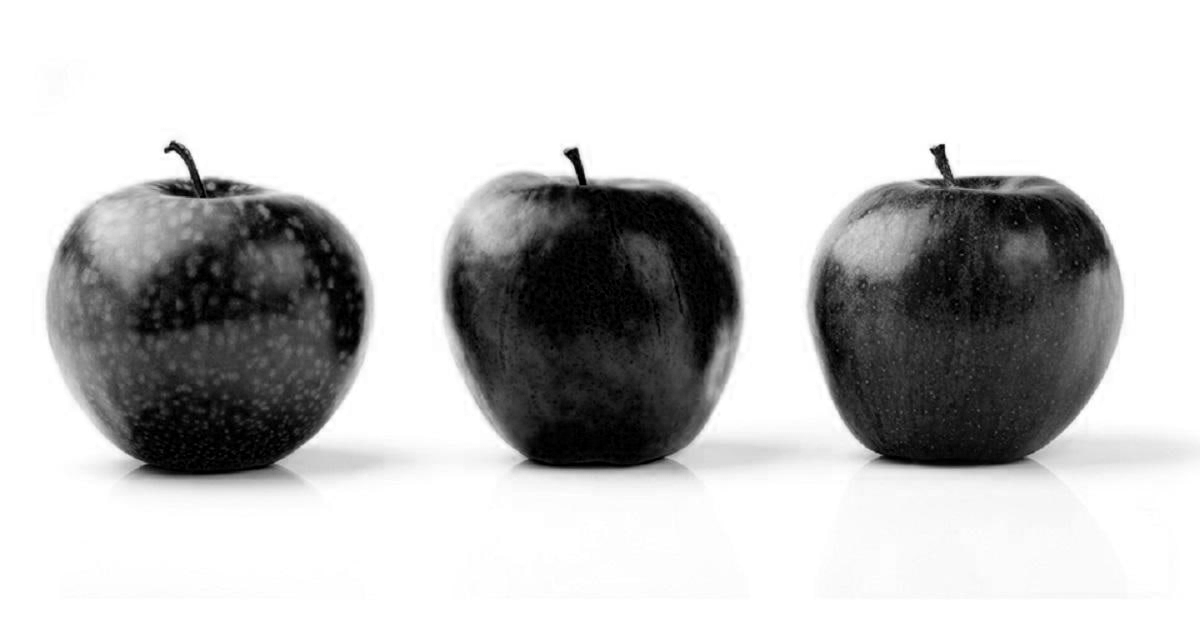

In [ ]:
cv2_imshow(b_img)

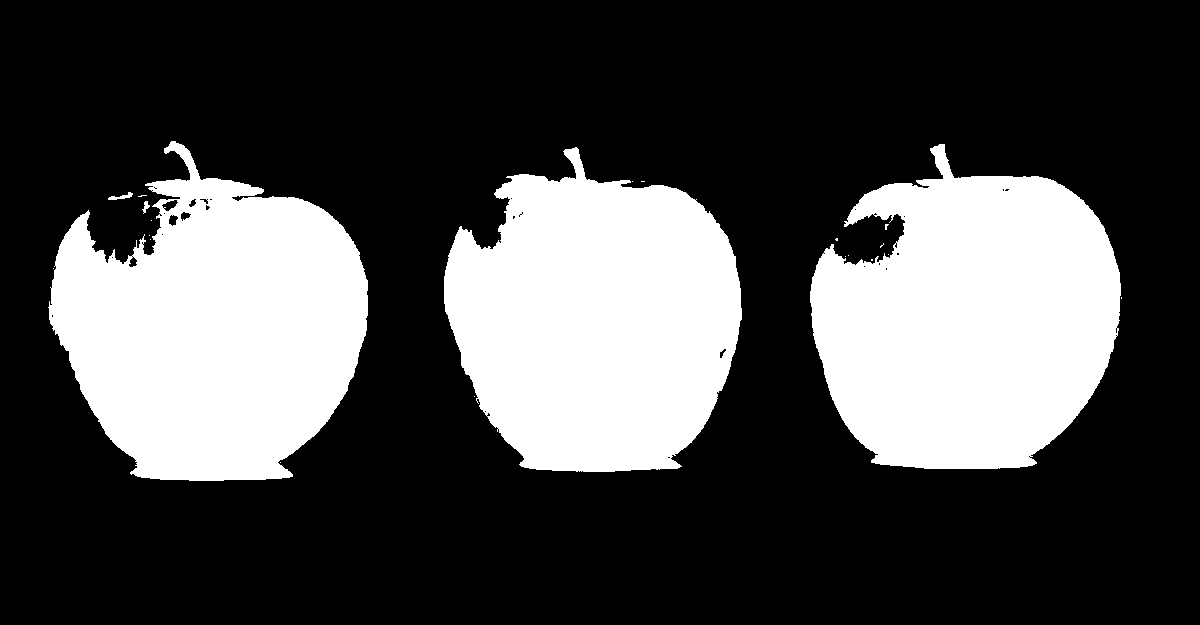

In [ ]:
_, binary_img = cv2.threshold(b_img, 170, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(binary_img)

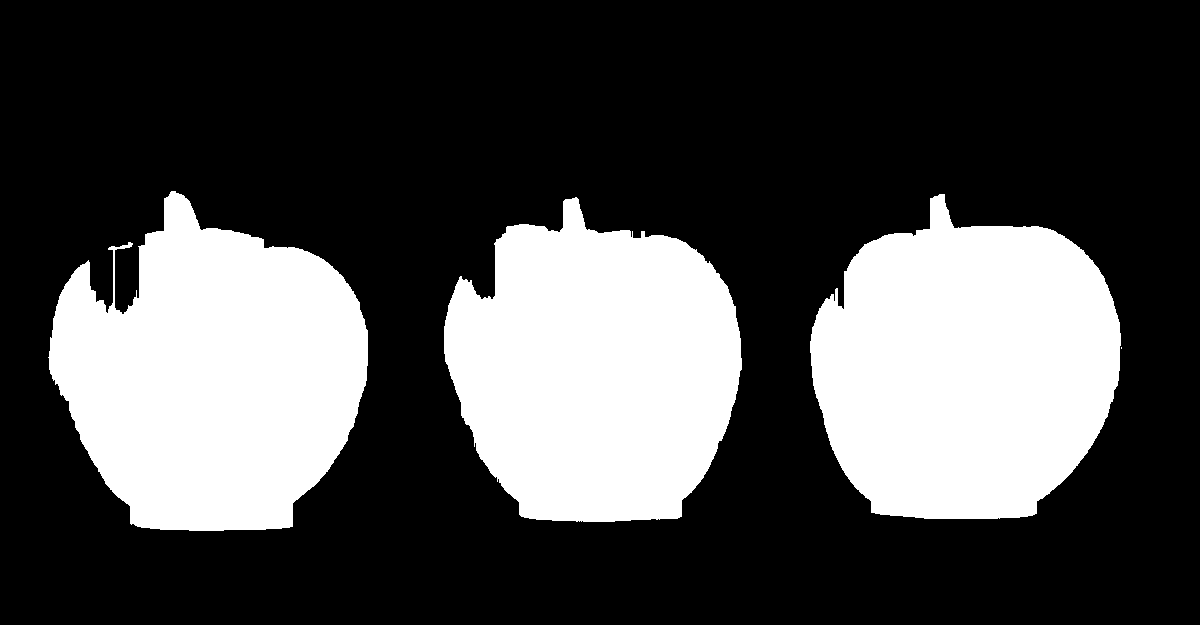

In [ ]:
closed_img = cv2.morphologyEx(binary_img, cv2.MORPH_CLOSE, (100,100), iterations=50)
cv2_imshow(closed_img)

In [ ]:
contours, hierarchy = cv2.findContours(closed_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print(len(contours))

4


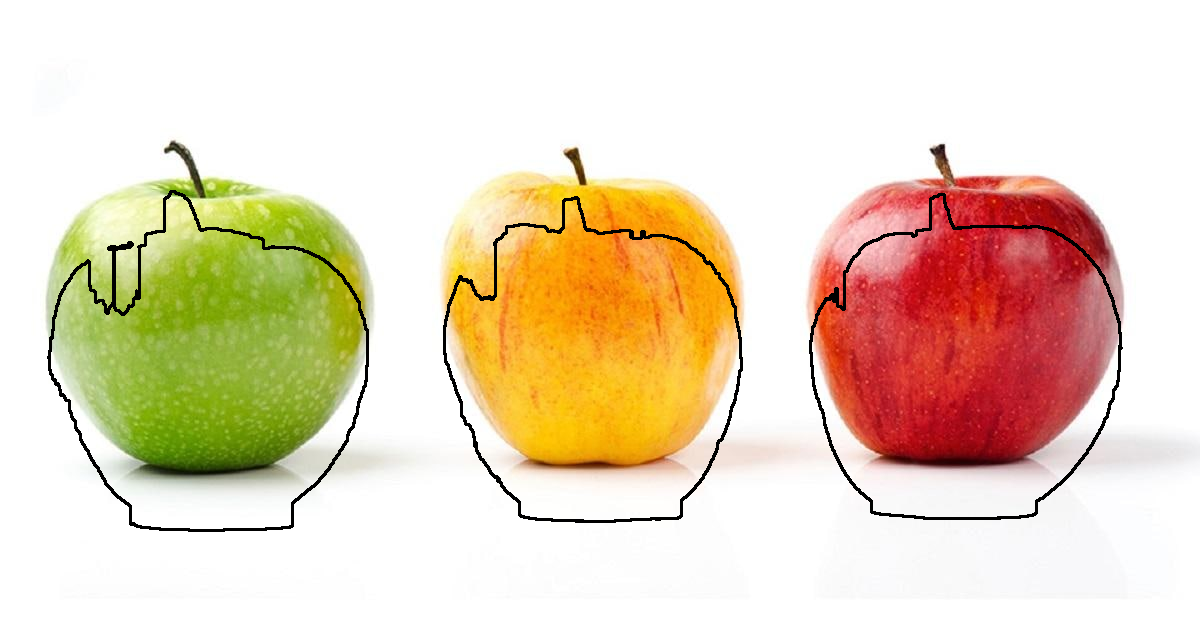

In [ ]:
img_copy = img.copy()
cv2_imshow(cv2.drawContours(img_copy, contours, -1, (0, 0, 0), 2))

In [ ]:
contours, hierarchy = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print(len(contours))

22


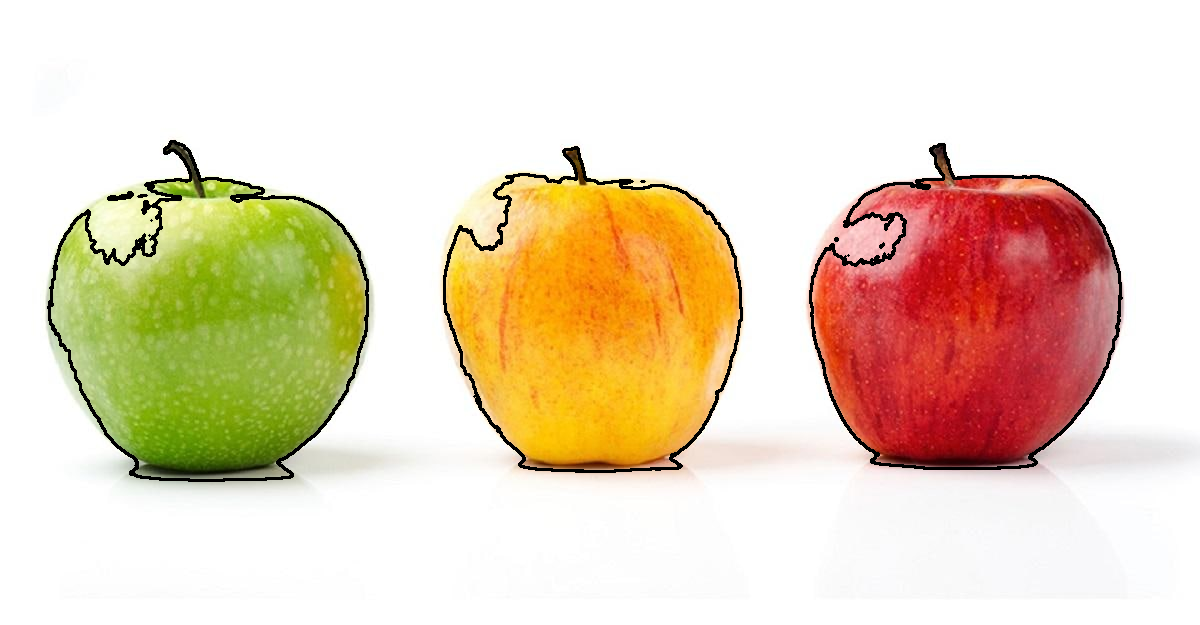

In [ ]:
img_copy = img.copy()
cv2_imshow(cv2.drawContours(img_copy, contours, -1, (0, 0, 0), 2))

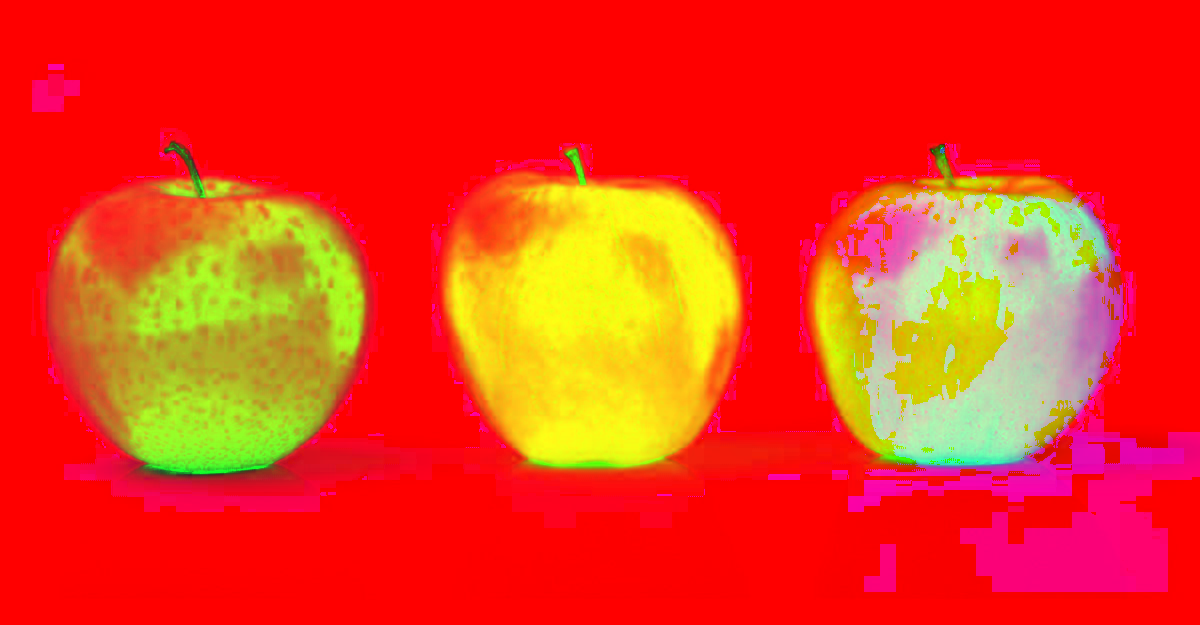

In [ ]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2_imshow(hsv)

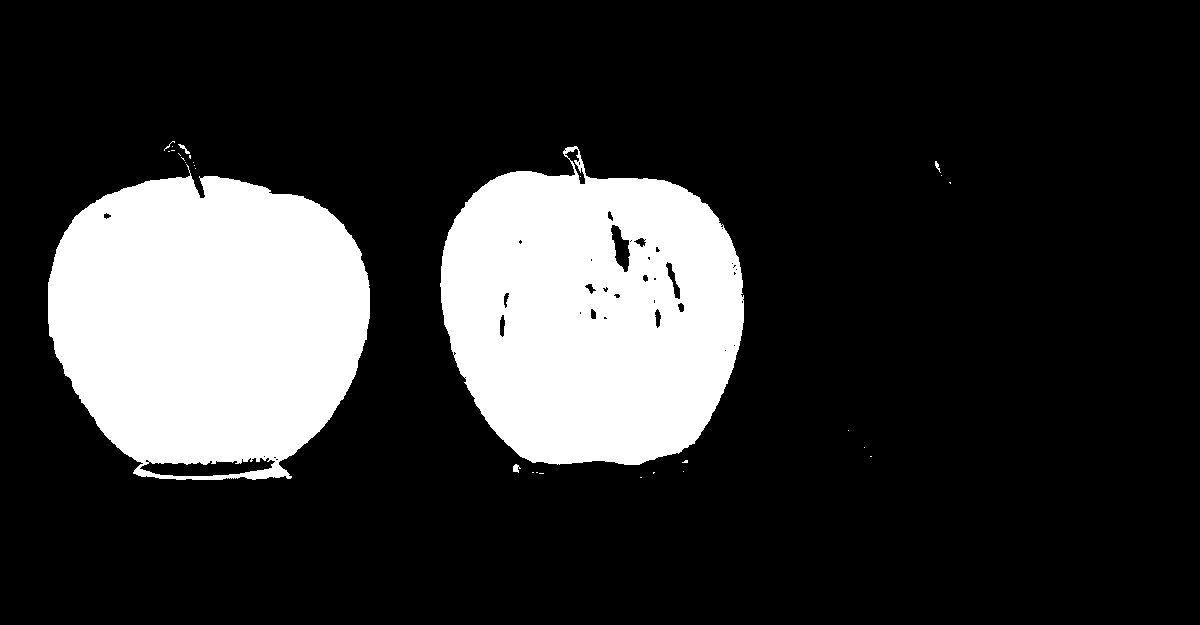

In [ ]:
cv2_imshow(cv2.inRange(hsv, (15, 30, 95), (70, 255, 255)))

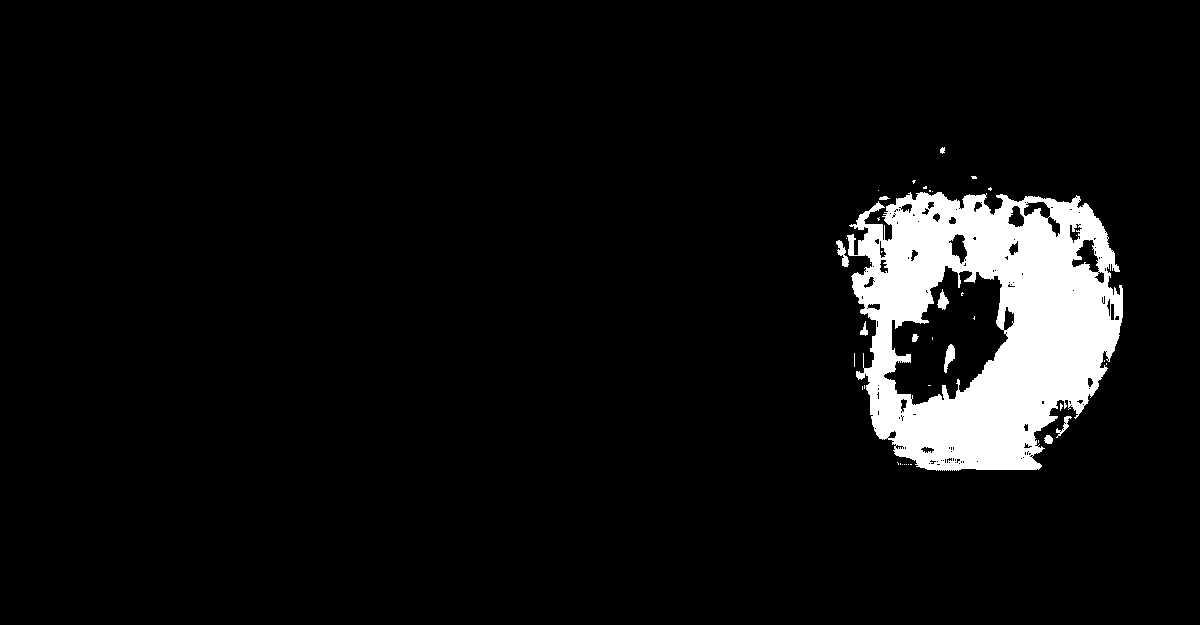

In [ ]:
cv2_imshow(cv2.inRange(hsv, (140, 30, 0), (180, 255, 255)))

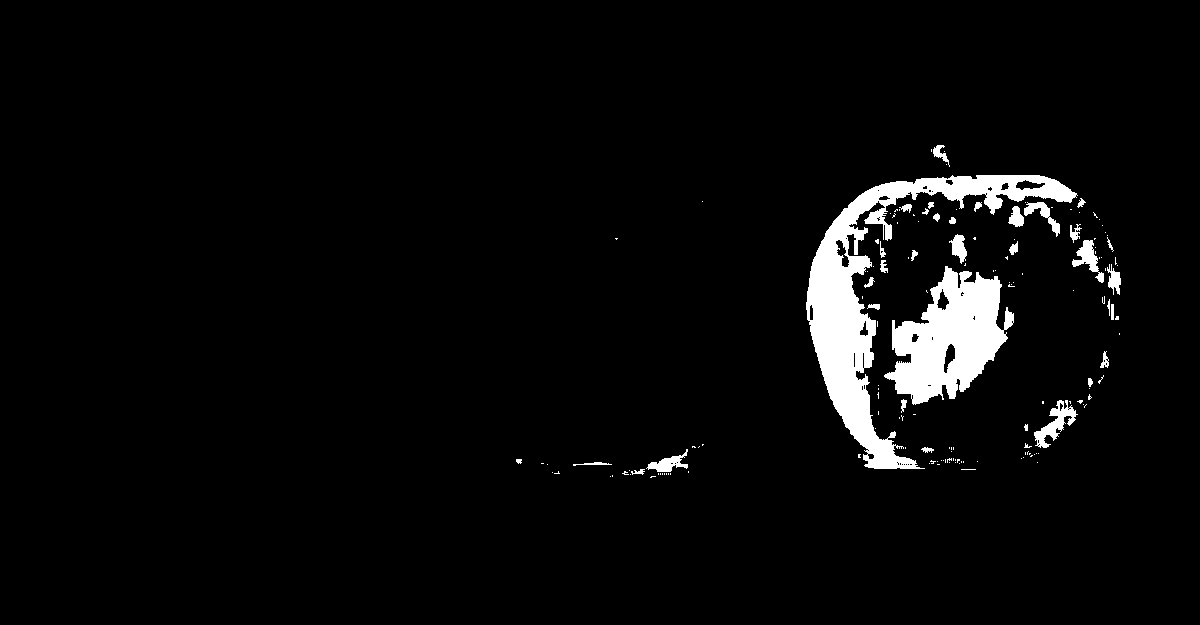

In [ ]:
cv2_imshow(cv2.inRange(hsv, (0, 30, 0), (10, 255, 255)))

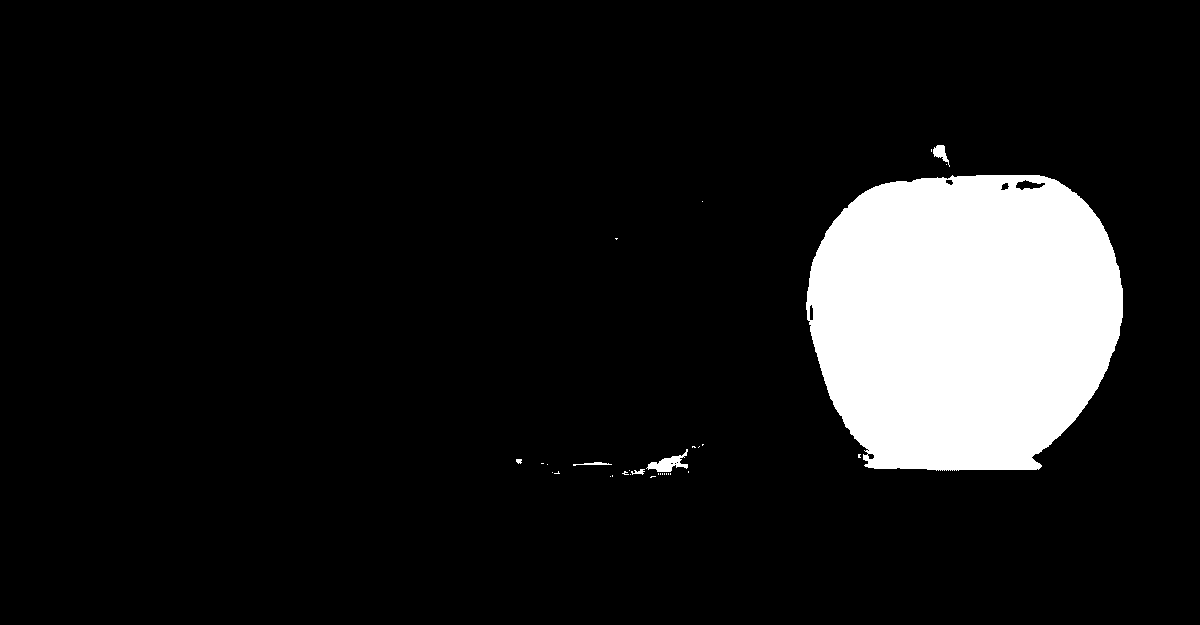

In [ ]:
cv2_imshow(cv2.inRange(hsv, (0, 30, 0), (10, 255, 255)) + cv2.inRange(hsv, (140, 30, 0), (180, 255, 255)))

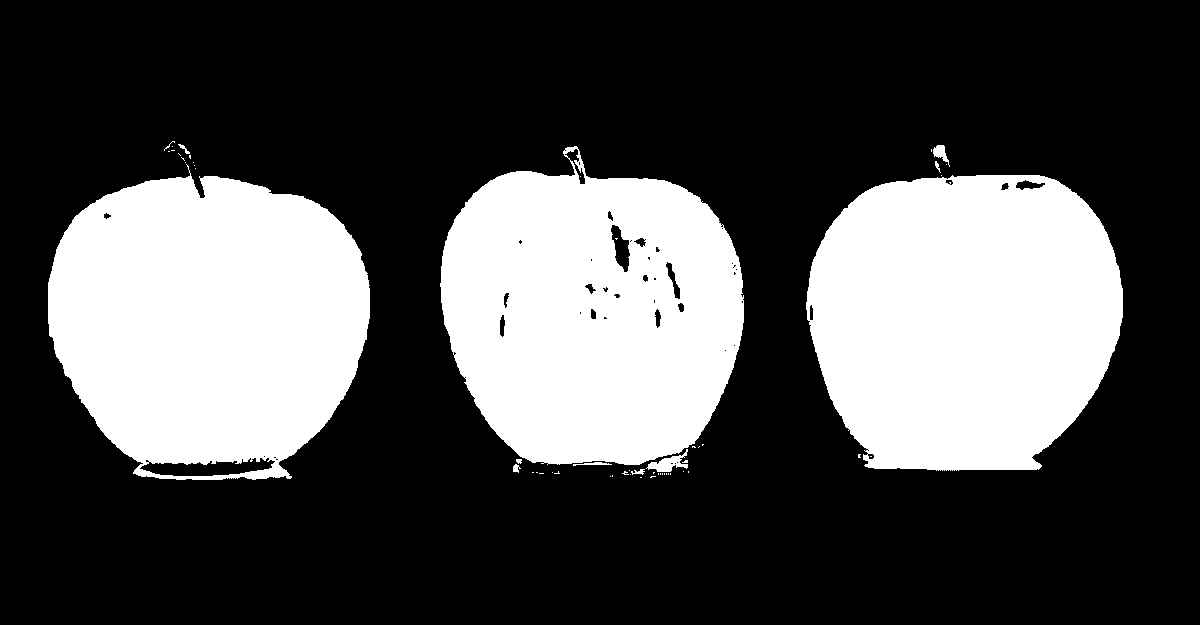

In [ ]:
mask = cv2.inRange(hsv, (0, 30, 0), (10, 255, 255)) + cv2.inRange(hsv, (140, 30, 0), (180, 255, 255)) + cv2.inRange(hsv, (15, 30, 95), (70, 255, 255))
cv2_imshow(mask)

52


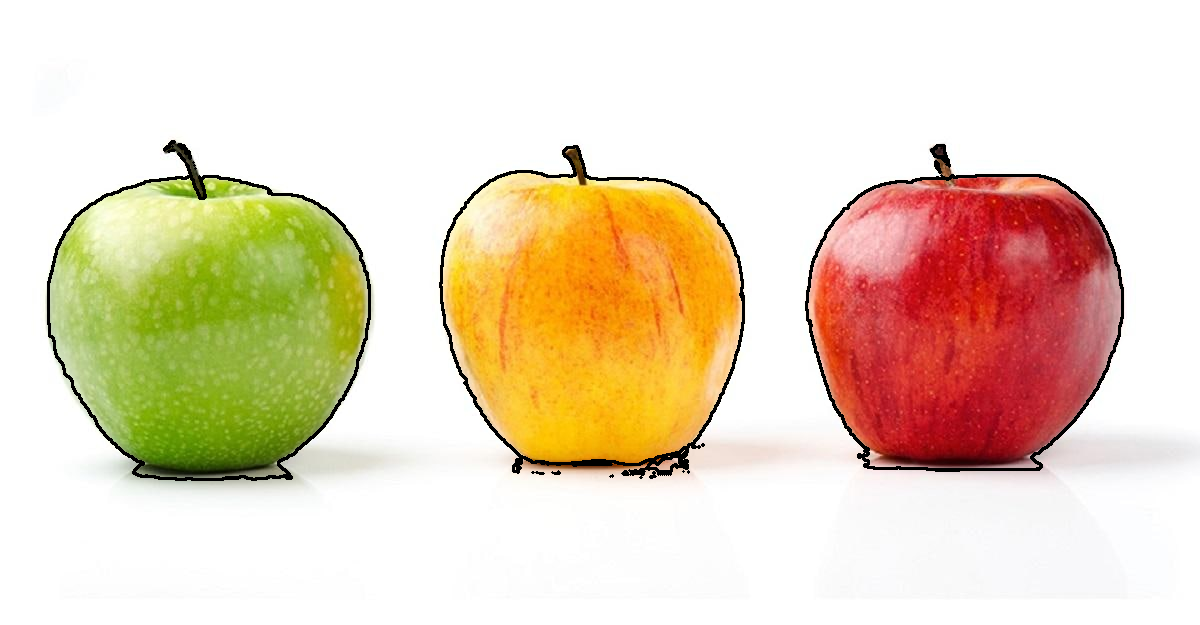

In [ ]:
contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print(len(contours))

apple1 = img.copy()
cv2_imshow(cv2.drawContours(apple1, contours, -1, (0, 0, 0), 2))

In [ ]:
cv2.contourArea(sorted(contours, key=cv2.contourArea, reverse=True)[0])

77666.0

In [ ]:
cv2.contourArea(sorted(contours, key=cv2.contourArea, reverse=True)[1])

76966.0

In [ ]:
cv2.contourArea(sorted(contours, key=cv2.contourArea, reverse=True)[2])

73855.5

In [ ]:
cv2.contourArea(sorted(contours, key=cv2.contourArea, reverse=True)[3])

335.0

52


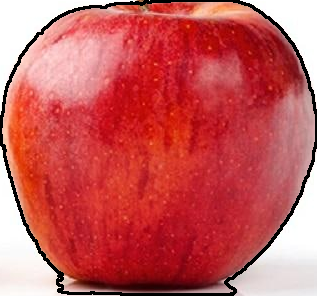

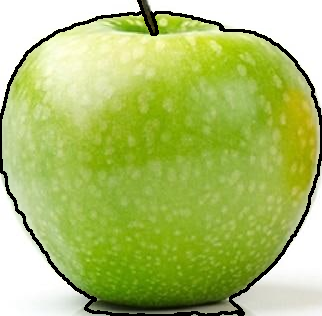

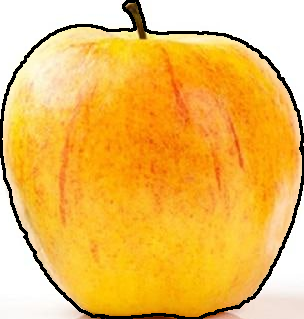

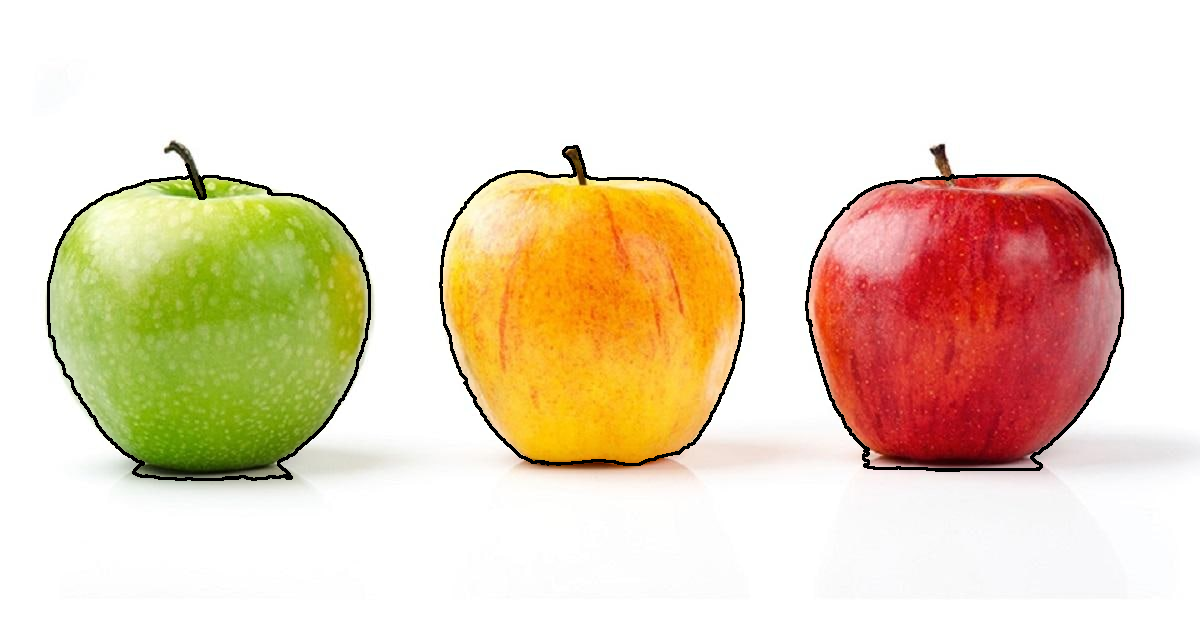

3


In [ ]:
contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print(len(contours))

apple1 = img.copy()

count = 0
for cnt in contours:
  if cv2.contourArea(cnt) < 70000:
    continue
  cv2.drawContours(apple1, [cnt], 0, (0, 0, 0), 2)
  x, y, w, h = cv2.boundingRect(cnt)
  cv2_imshow(apple1[y:y+h, x:x+w])
  count += 1

cv2_imshow(apple1)
print(count)

Take each rectangle, and then, get the percentage of red, green, and yellow in that cropped image; seeing which one has the upper value.

# Apple 2

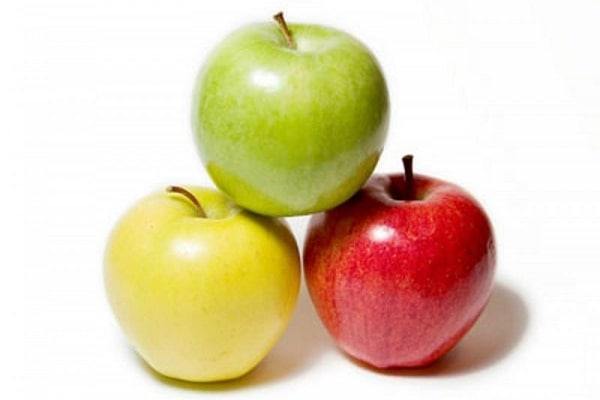

In [ ]:
apple2 = cv2.imread("apple2.jpg")
cv2_imshow(apple2)

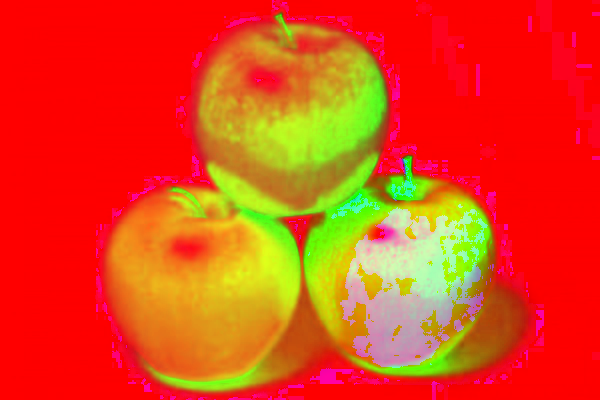

In [ ]:
apple2_hsv = cv2.cvtColor(apple2, cv2.COLOR_BGR2HSV)
cv2_imshow(apple2_hsv)

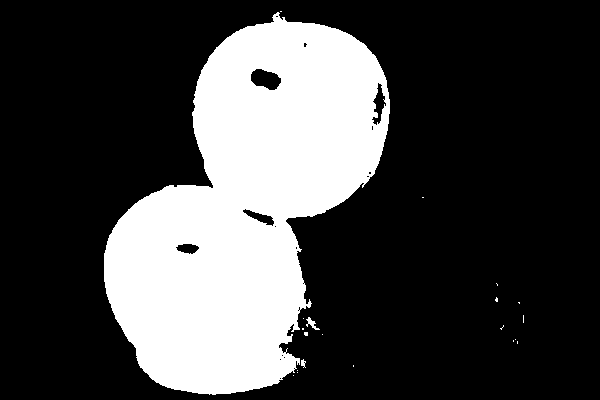

In [ ]:
cv2_imshow(cv2.inRange(apple2_hsv, (15, 30, 95), (70, 255, 255)))

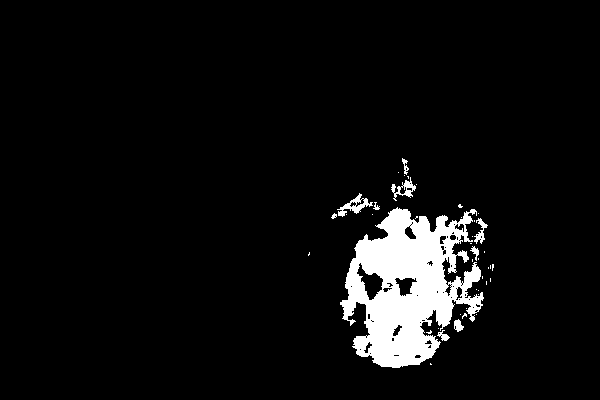

In [ ]:
cv2_imshow(cv2.inRange(apple2_hsv, (140, 30, 0), (180, 255, 255)))

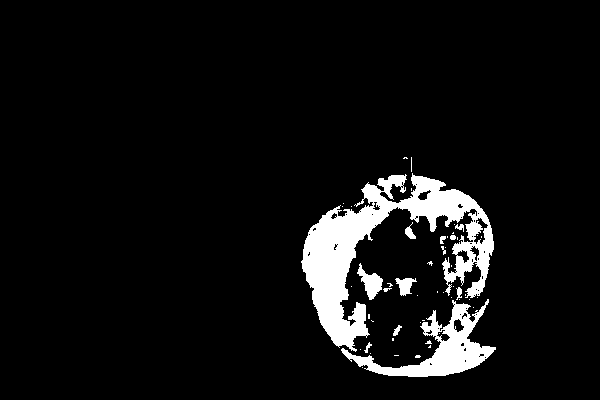

In [ ]:
cv2_imshow(cv2.inRange(apple2_hsv, (0, 90, 50), (10, 255, 255)))

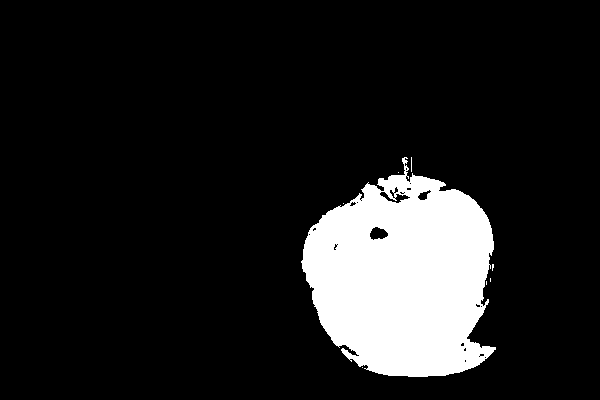

In [ ]:
cv2_imshow(cv2.inRange(apple2_hsv, (0, 90, 50), (10, 255, 255)) + cv2.inRange(apple2_hsv, (140, 30, 0), (180, 255, 255)))

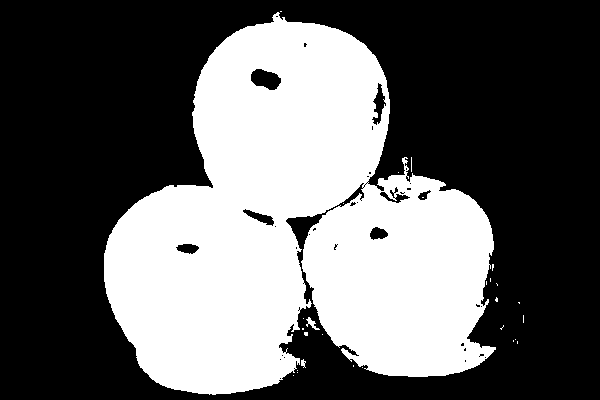

In [ ]:
apple2_mask = cv2.inRange(apple2_hsv, (0, 90, 50), (10, 255, 255)) + cv2.inRange(apple2_hsv, (140, 30, 0), (180, 255, 255)) + cv2.inRange(apple2_hsv, (15, 30, 95), (70, 255, 255))
cv2_imshow(apple2_mask)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
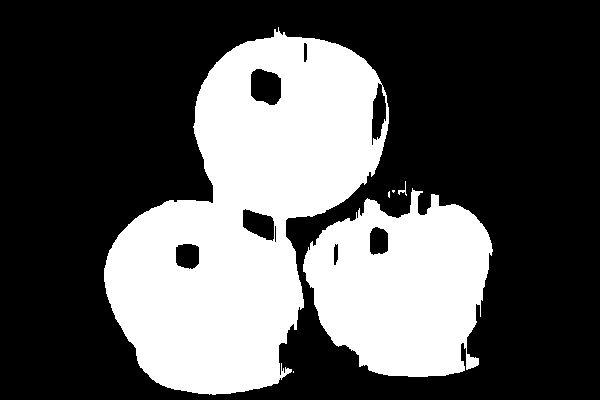

In [ ]:
cv2.erode(apple2_mask, (15, 1), iterations=15)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
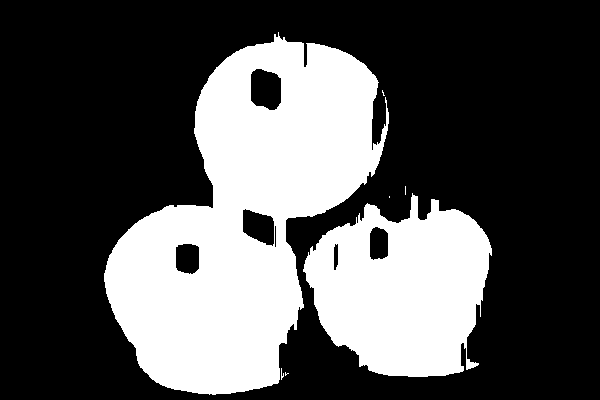

In [ ]:
cv2.morphologyEx(apple2_mask, cv2.MORPH_ERODE, (100, 1), iterations=20)

In [ ]:
import cv2
import numpy as np

img = cv2.imread('apple2.jpg', -1)

rgb_planes = cv2.split(img)

result_planes = []
result_norm_planes = []
for plane in rgb_planes:
    dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
    bg_img = cv2.medianBlur(dilated_img, 5)
    # bg_img = cv2.medianBlur(plane, 11)
    diff_img = 255 - cv2.absdiff(plane, bg_img)
    norm_img = cv2.normalize(diff_img,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
    result_planes.append(diff_img)
    result_norm_planes.append(norm_img)

result = cv2.merge(result_planes)
result_norm = cv2.merge(result_norm_planes)

cv2.imwrite('shadows_out.png', result)
cv2.imwrite('shadows_out_norm.png', result_norm)

True